In [1]:
!pip install pydot pydotplus graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import string
import requests
import pandas as pd
from pprint import pprint

In [4]:
response = requests.get('https://raw.githubusercontent.com/laxmimerit/poetry-data/master/adele.txt')

In [5]:
data=response.text.splitlines()
print(data[:10]) # 10 sample

['Looking for some education', 'Made my way into the night', 'All that bullshit conversation', "Baby, can't you read the signs? I won't bore you with the details, baby", "I don't even wanna waste your time", "Let's just say that maybe", 'You could help me ease my mind', "I ain't Mr. Right But if you're looking for fast love", "If that's love in your eyes", "It's more than enough"]


In [6]:
data[:10]

['Looking for some education',
 'Made my way into the night',
 'All that bullshit conversation',
 "Baby, can't you read the signs? I won't bore you with the details, baby",
 "I don't even wanna waste your time",
 "Let's just say that maybe",
 'You could help me ease my mind',
 "I ain't Mr. Right But if you're looking for fast love",
 "If that's love in your eyes",
 "It's more than enough"]

In [7]:
print(f"Number of sample: {len(data)}")

Number of sample: 2400


In [8]:
# Total word number is:
print("Number of words: ", len(" ".join(data)))

Number of words:  91330


In [9]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

Tokenization

In [10]:
""" For example, if the original text was "This is a sample sentence", and the tokenizer's vocabulary was {'this': 1, 'is': 2, 'a': 3, 'sample': 4, 'sentence': 5},
 the sequence of integers representing this sentence would be [1, 2, 3, 4, 5]."""

' For example, if the original text was "This is a sample sentence", and the tokenizer\'s vocabulary was {\'this\': 1, \'is\': 2, \'a\': 3, \'sample\': 4, \'sentence\': 5},\n the sequence of integers representing this sentence would be [1, 2, 3, 4, 5].'

In [11]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data) #it's going to fit on the data in the forms of lines.

data = [    "This is a sample sentence.",    "Another example sentence.",    "Yet another example sentence."]
tokenization:
{
    'this': 1,
    'is': 2,
    'a': 3,
    'sample': 4,
    'sentence': 5,
    'another': 6,
    'example': 7,
    'yet': 8
}
finally encoding:
[
    [1, 2, 3, 4, 5],
    [6, 7, 5],
    [8, 6, 7, 5]
]



In [12]:
encoded_text=tokenizer.texts_to_sequences(data)
encoded_text[:10]
# These number actually comes from vocabulary
# it assigns number to each words

[[254, 21, 219, 725],
 [117, 8, 80, 153, 3, 133],
 [14, 10, 726, 727],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40, 3, 518, 41],
 [1, 23, 107, 189, 300, 9, 57],
 [286, 35, 46, 10, 230],
 [2, 83, 134, 4, 519, 8, 120],
 [1, 37, 520, 102, 19, 27, 25, 254, 21, 328, 11],
 [27, 209, 11, 13, 9, 124],
 [42, 67, 210, 125]]

In [13]:
wc=tokenizer.word_counts
# word frequency
print(wc)

OrderedDict([('looking', 12), ('for', 145), ('some', 15), ('education', 2), ('made', 30), ('my', 370), ('way', 43), ('into', 23), ('the', 632), ('night', 26), ('all', 174), ('that', 255), ('bullshit', 2), ('conversation', 2), ('baby', 86), ("can't", 63), ('you', 866), ('read', 3), ('signs', 2), ('i', 935), ("won't", 51), ('bore', 4), ('with', 87), ('details', 4), ("don't", 134), ('even', 32), ('wanna', 18), ('waste', 9), ('your', 274), ('time', 63), ("let's", 10), ('just', 100), ('say', 74), ('maybe', 14), ('could', 42), ('help', 26), ('me', 484), ('ease', 4), ('mind', 29), ("ain't", 98), ('mr', 4), ('right', 33), ('but', 154), ('if', 121), ("you're", 123), ('fast', 8), ('love', 243), ("that's", 16), ('in', 216), ('eyes', 28), ("it's", 84), ('more', 52), ('than', 16), ('enough', 28), ('had', 69), ('bad', 5), ('so', 135), ('is', 113), ("i've", 81), ('got', 15), ('on', 101), ('ooh', 66), ('affirmation', 2), ('sun', 10), ('friends', 5), ('their', 4), ('ladies', 2), ('and', 400), ("they're

In [ ]:
wi=tokenizer.word_index

In [14]:
wi = tokenizer.word_index
print(wi)
# pprint(wi)

{'i': 1, 'you': 2, 'the': 3, 'me': 4, 'to': 5, 'it': 6, 'and': 7, 'my': 8, 'your': 9, 'that': 10, 'love': 11, 'of': 12, 'in': 13, 'all': 14, 'we': 15, 'a': 16, "i'm": 17, 'when': 18, 'but': 19, 'be': 20, 'for': 21, 'so': 22, "don't": 23, 'never': 24, "you're": 25, 'let': 26, 'if': 27, 'is': 28, 'know': 29, 'up': 30, 'go': 31, 'down': 32, 'will': 33, 'on': 34, 'just': 35, 'do': 36, "ain't": 37, 'heart': 38, 'like': 39, 'with': 40, 'baby': 41, "it's": 42, 'want': 43, 'this': 44, "i've": 45, 'say': 46, 'no': 47, 'as': 48, 'had': 49, 'make': 50, 'can': 51, 'out': 52, 'ooh': 53, 'was': 54, 'one': 55, "can't": 56, 'time': 57, 'what': 58, 'are': 59, 'feel': 60, 'see': 61, "i'll": 62, 'fall': 63, 'there': 64, 'were': 65, 'gonna': 66, 'more': 67, "won't": 68, 'oh': 69, 'back': 70, 'face': 71, 'have': 72, 'yeah': 73, 'at': 74, "'cause": 75, 'only': 76, 'been': 77, 'stand': 78, 'ready': 79, 'way': 80, 'take': 81, 'has': 82, 'could': 83, 'she': 84, 'give': 85, 'wish': 86, 'now': 87, 'lay': 88, 'th

In [15]:
print(f"Number of unique words and total vocab size: {len(tokenizer.word_counts)+1}")
vocab_size=len(tokenizer.word_counts)+1 # always adding plus one for tensorflow

Number of unique words and total vocab size: 1396


In [16]:
x=["play this song"]

In [17]:
tokenizer.texts_to_sequences(x)

[[241, 44, 409]]

In [18]:
encoded_text[:10] # 10 sample

[[254, 21, 219, 725],
 [117, 8, 80, 153, 3, 133],
 [14, 10, 726, 727],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40, 3, 518, 41],
 [1, 23, 107, 189, 300, 9, 57],
 [286, 35, 46, 10, 230],
 [2, 83, 134, 4, 519, 8, 120],
 [1, 37, 520, 102, 19, 27, 25, 254, 21, 328, 11],
 [27, 209, 11, 13, 9, 124],
 [42, 67, 210, 125]]

In [ ]:
data_list=[]
for i in encoded_text:
    if len(i)>1:
        for j in range(2,len(i)):
            data_list.append(i[:j])

            print(i[:j]) # if you want to check data

In [21]:
max_length=20
#max length of line is 20 token per line in our poetry

data_list = [
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Length: 10, shorter than max_length
    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],  # Length: 15, shorter than max_length
    [26, 27, 28, 29, 30],  # Length: 5, shorter than max_length
    [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],  # Length: 20, equal to max_length
    [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75],  # Length: 25, longer than max_length
]

sequences = pad_sequences(data_list, maxlen=20, padding="pre")
print(sequences)

[[ 0  0  0  0  0  0  0  0  0  0  1  2  3  4  5  6  7  8  9 10]
 [0  0  0  0  0  11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
 [ 0  0  0  0  0  0  0  0  0  0 26 27 28 29 30  0  0  0  0  0]
 [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
 [51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
 ]



In [22]:
sequences=pad_sequences(data_list,maxlen=max_length,padding="pre") # we set the lenght size equal to 20
sequences[:5] # 5 sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 254,  21],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 254,  21, 219],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 117,   8],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 117,   8,  80],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 117,   8,  80, 153]], dtype=int32)

In [23]:
sequences.shape

(14231, 20)

In [24]:
X=sequences[:,:-1] #X contains only input features aita ensure kora hocche ai code er maddhome
y=sequences[:,-1] #Y contains only label ensured
print("X values")
print(X[:5]) # 5 sample
print("-"*30)
print("Y values")
print(y[:5]) # 5 sample

X values
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  254]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 254
   21]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  117]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 117
    8]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 117   8
   80]]
------------------------------
Y values
[ 21 219   8  80 153]


In [25]:
X.shape,y.shape

((14231, 19), (14231,))

In [26]:
y=to_categorical(y,num_classes=vocab_size) #0 or 1 class this is binary class
#since unique word number is vocab_size, thus there is vocab_size classes
print(y[:5]) # 5 sample
print("Shape of y",y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of y (14231, 1396)


In [27]:
print("Shape of X",X.shape)
seq_length=X.shape[1]
seq_length

Shape of X (14231, 19)


19

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Set input_shape=(seq_length,) in the Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_shape=(seq_length,)))

# The first layer is the Embedded layer that uses 50-length vectors
# return_sequences=True because we add another LSTM
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))

# Fully connected layers
model.add(Dense(100, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))  # We use softmax because there are multiple classes

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 19, 50)              │          69,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 19, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1396)                │         140,996 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,696 (1.38 MB)

 Trainable params: 361,696 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

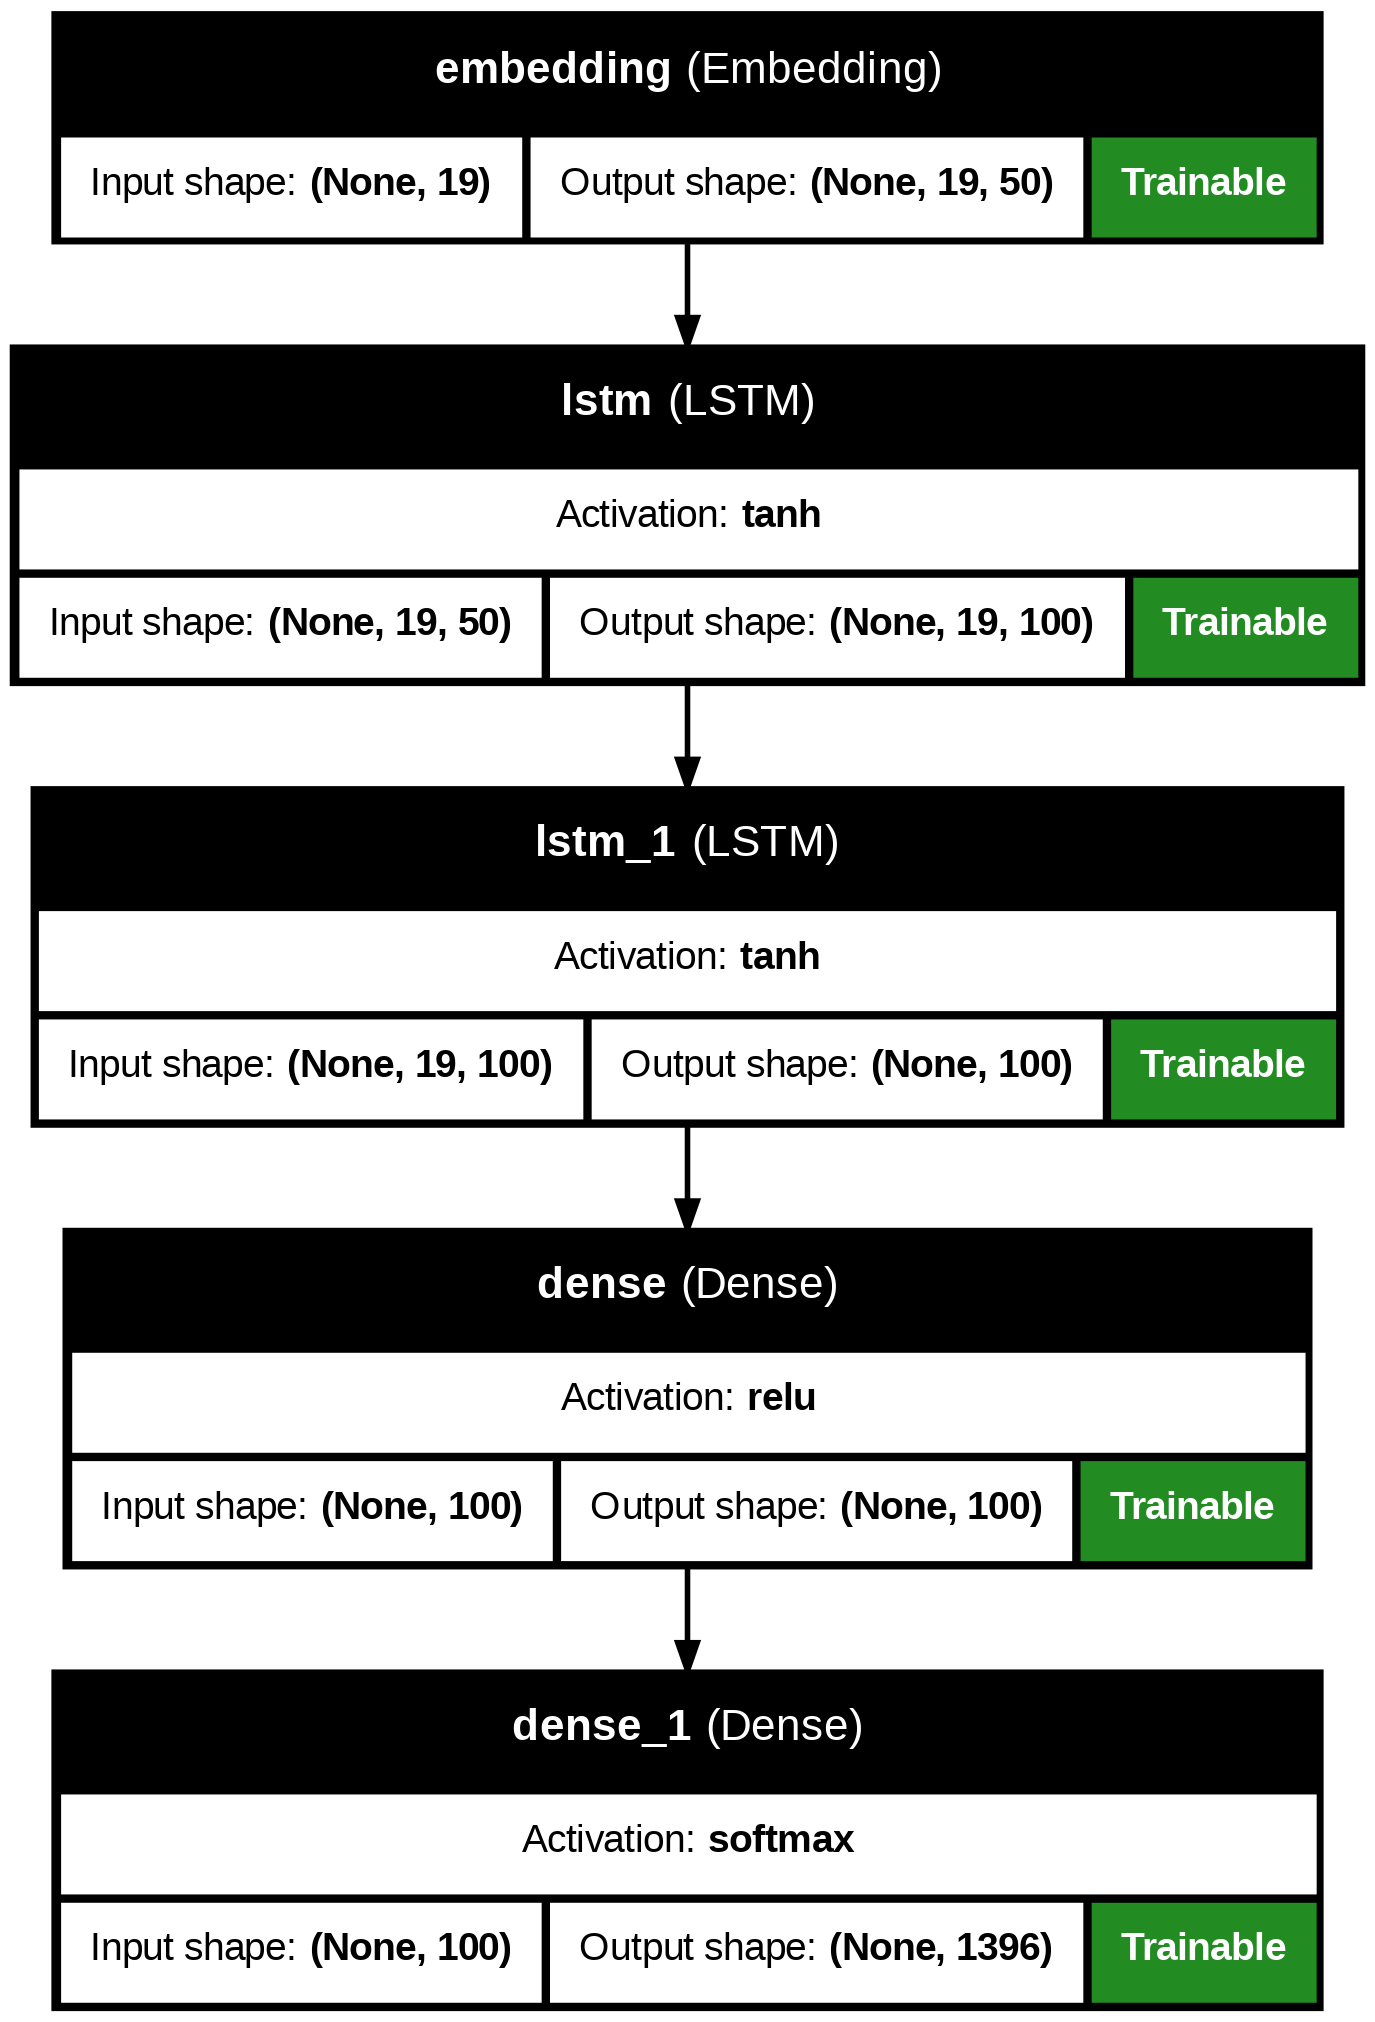

In [31]:
plot_model(
    model,
    to_file="Text_generation_using_Adele_dataset_LSTM.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [40]:
# model.fit(X,y,batch_size=32,epochs=5) # for better accuracy, try to train for more epoch using t4 gpu
history = model.fit(X,y,batch_size=32,epochs=200)

445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8432 - loss: 0.5173
Epoch 193/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8475 - loss: 0.4947
Epoch 194/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8384 - loss: 0.5181
Epoch 195/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8381 - loss: 0.5263
Epoch 196/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8431 - loss: 0.5031
Epoch 197/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8431 - loss: 0.5006
Epoch 198/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8420 - loss: 0.5147
Epoch 199/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8420 - loss: 0.5083
Epoch 200/200
445/445 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8380 - loss: 0.5141


In [47]:
# history
# history.history
history.history.keys()

dict_keys(['accuracy', 'loss'])

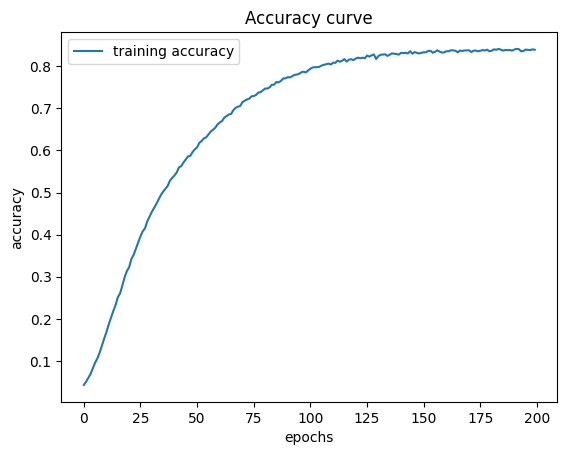

In [48]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

# Get number of epochs
epochs = range(len(acc))

plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

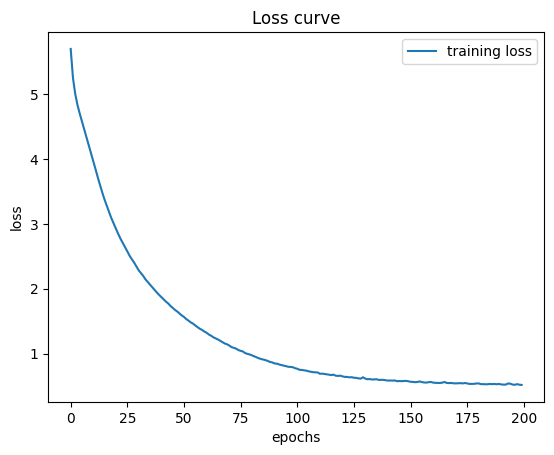

In [49]:
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [50]:
text_lenght= 15 # 15 words per line

def generate_text(input_text, no_lines):
    general_text=[]
    for i in range(no_lines):
        text=[]
        for _ in range(text_lenght):
            encoded=tokenizer.texts_to_sequences([input_text])
            encoded=pad_sequences(encoded,maxlen=seq_length,padding="pre")
            y_pred=np.argmax(model.predict(encoded),axis=-1) # it will generate a word index, loop up into dictionary containing word index

            predicted_word=""
            for word,index in tokenizer.word_index.items():
                if index==y_pred:
                    predicted_word=word
                    break

            input_text=input_text +' '+ predicted_word
            text.append(predicted_word)

        input_text=text[-1]
        text=" ".join(text) # input text will be the last word of first created line
        general_text.append(text)

    return general_text

In [59]:
# prompt="What is life ?"
prompt = "Hello from the other side"
text_produced_1 = generate_text(prompt,1)
text_produced_3 = generate_text(prompt,3)
print(text_produced_1)
print(text_produced_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
["other a wide right in my roots it's in my heart then i start it's"]
["other a wide right in my roots it's in my heart then i start it's", "more than just a fire starting in my body it's in my heart then played", "do about in the state that i've ever too single single one i'll be on"]
